## Московские цены на аренду комнаты

Установим нужные нам пакеты

In [1]:
!pip install shapely folium geopandas lightgbm tqdm shap geopy pyshp

  Using cached https://files.pythonhosted.org/packages/a4/83/6e4a9cc870c117bf8316e8aa2513c5070f9ae2f8bd69469476414cd42595/lightgbm-2.3.0-py2.py3-none-macosx_10_8_x86_64.macosx_10_9_x86_64.macosx_10_10_x86_64.macosx_10_11_x86_64.macosx_10_12_x86_64.macosx_10_13_x86_64.macosx_10_14_x86_64.whl


In [2]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import folium
import matplotlib as mpl
import matplotlib.cm as cm
pd.options.display.max_columns = 200

In [3]:
df = pd.read_csv('flat_prices_room.csv.zip', compression='zip')
df.head(3)

,lat,lon,ID объявления,Адрес,Балкон,"Высота потолков, м",Дом,Дополнительно,Количество комнат,Лифт,Метро,Можно с детьми/животными,Мусоропровод,Название ЖК,Окна,Описание,Парковка,"Площадь комнат, м2","Площадь, м2",Ремонт,Санузел,Серия дома,Состав съемщиков,Ссылка на объявление,Телефоны,Тип,Цена,floor,max_floor,Холодильник,Мебель в комнатах,Мебель на кухне,Ванна,Интернет,Телевизор,Душевая кабина,rooms,Изолированная,room_area,total_area,long_rent,Комунальные услуги,price,url
0,55.846067,37.195409,156430705,"Московская область, Красногорск городской окру...",NaN,2.70,"1/1, Деревянный","Мебель в комнатах, Мебель на кухне, Душевая ка...","1(2), Изолированная",NaN,NaN,NaN,NaN,NaN,NaN,Комната 16м2 в жилом доме с отдельным входом о...,NaN,NaN,16.0/35.0/12.0,Косметический,Совмещенный (1),NaN,Семья,https://www.cian.ru/rent/flat/156430705,+79250510387,Комната,"16000.0 руб./ За месяц, Залог - 16000 руб., Ко...",1,1,True,True,True,False,False,True,True,0,True,16.0,35.0,True,True,16000.0,https://www.cian.ru/rent/flat/156430705
1,55.978941,37.192633,195369878,"Москва, Зеленоград, к802",NaN,2.64,"1/9, Панельный","Мебель в комнатах, Мебель на кухне, Ванна, Сти...","1(3), Изолированная",Пасс (1),NaN,NaN,Да,NaN,Во двор,Комната есть в наличии! Срочно! Сдам комнату в...,NaN,NaN,11.0/65.0/6.0,Косметический,Раздельный (1),NaN,Любой,https://www.cian.ru/rent/flat/195369878,+79037136464,Комната,"10000.0 руб./ За месяц, Коммунальные услуги вк...",1,9,True,True,True,True,False,False,False,0,True,11.0,65.0,True,True,10000.0,https://www.cian.ru/rent/flat/195369878
2,55.596442,37.201284,194973629,"Москва, Марушкинское поселение, д. Марушкино, 12",NaN,NaN,"5/12, Панельный","Мебель в комнатах, Мебель на кухне, Ванна, Тел...","1(3), Изолированная",Пасс (1),NaN,Можно с детьми,Да,NaN,Во двор,Это д. Марушкино д.12 рядом с Кокошкино и ста...,NaN,NaN,16.0/56.0/7.0,Косметический,Раздельный (1),NaN,Любой,https://www.cian.ru/rent/flat/194973629,"+79035254111, +79661445343",Комната,"12000.0 руб./ За месяц, Коммунальные услуги вк...",5,12,True,True,True,True,False,True,False,0,True,16.0,56.0,True,True,12000.0,https://www.cian.ru/rent/flat/194973629


In [4]:
len(df)

3181

Параметры комнаты в Главном Здании МГУ

In [5]:
gz_parameters = {
    'lat': 55.703672, 
    'lon': 37.529788, 
    'Дом': '9/30 Кирпичный', 
    'Количество комнат': 1, 
    'Метро': 'Университет (20 мин пешком)',
    'Можно с детьми/животными': np.nan,
    'Мусоропровод': 'Да',
    'Окна': 'Во двор',
    'Парковка': 'наземная',
    'Площадь комнат, м2': 10,
    'Площадь, м2': '10/4/0',
    'Ремонт': 'Косметический',
    'Санузел': 'Раздельный (1)',
    'Тип': 'Комната',
    'floor': 9,
    'max_floor': 30,
    'Холодильник': False,
    'Мебель в комнатах': True,
    'Мебель на кухне': False,
    'Ванна': False,
    'Интернет': True,
    'Телевизор': False,
    'Душевая кабина': True,
    'rooms': 1,
    'Изолированная': True,
    'room_area': 10,
    'total_area': 14,
    'long_rent': True,
    'Комунальные услуги': False,
    'Состав съемщиков': 'Любой',
    'ID  объявления':  'gz_room',
    'price': 15000
}

Добавим в общий датафрейм

In [6]:
df = pd.concat([df, pd.DataFrame([gz_parameters])], ignore_index=True)

/Users/ofirserovlad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [7]:
df = df[df['Тип'] == 'Комната']

Отфильтруем значения в которых нет координат

In [8]:
df = df[~df['lat'].isnull()]

#### Для отображения геообъектов в jupyter notebook - folium

In [9]:
center = {'lat': 55.756204, 'lon': 37.616675}

In [15]:
map_folium = folium.Map(location=(center['lat'], center['lon']),
                        tiles='Stamen Toner',
                        zoom_start=11)

Пройдемся по 1000 случайным строчкам в датафрейме и создадим на основе их folium объекты CircleMarker и добавим их на карту
При этом воспользуемся функциями для преобразования чисел в RGB цвет

In [16]:
norm = mpl.colors.Normalize(vmin=0, vmax=50000)
cmap = cm.plasma
colormap= cm.ScalarMappable(norm=norm, cmap=cmap)
for ind, row in df.sample(1000).iterrows():
    folium.CircleMarker([row['lat'], row['lon']],
                        radius=7,
                        popup='{}'.format('<br>'.join(map(str, [row['price']]))),
                        color=mpl.colors.rgb2hex((colormap.to_rgba(row['price']))),
                        fill_color=mpl.colors.rgb2hex((colormap.to_rgba(row['price']))),
                        fill=True, 
                        fill_opacity=0.9
                       ).add_to(map_folium)
map_folium

#### Найдем расстояние каждой точки до центра

In [13]:
from geopy import distance
df['distance_to_center'] = df.apply(lambda r: distance.distance((r['lat'], r['lon']), 
                                                                (center['lat'], center['lon'])
                                                               ).meters, axis=1)

Отфильтруем удаленные объекта от центра Москвы

In [14]:
df = df[df['distance_to_center'] < 5e4]
df['distance_to_center'].hist(bins=100)
df = df.reset_index(drop=True)

#### Извлечем признаки из сырых данных

In [15]:
df['Дом'].value_counts().head()

2/5, Кирпичный    79
4/5, Кирпичный    72
3/5, Кирпичный    71
5/5, Кирпичный    68
4/9, Панельный    67
Name: Дом, dtype: int64

Извлечем материал стен

In [16]:
df['wall_material'] = df['Дом'].str.split(',').str[1]

In [17]:
df['Метро'].value_counts().head()

м. Выхино (15 мин на машине)      12
м. Выхино (15 мин пешком)         11
м. Выхино (10 мин на машине)      10
м. Сходненская (15 мин пешком)    10
м. Отрадное (15 мин пешком)       10
Name: Метро, dtype: int64

Рассчитаем время до метро пешком. В случае если записано время на машине, то умнжим его на 5

In [18]:
df['metro_on_car'] = df['Метро'].str.contains('машине').astype(float)
df['metro_on_foot'] = df['Метро'].str.contains('пешком').astype(float)
df['minute_to_metro'] = df['Метро'].str.split('(').str[1].str.split(' ').str[0]
df['minute_to_metro'] = pd.to_numeric(df['minute_to_metro'], errors='coerce')
minutes_on_foot_vs_car = 5
df['minute_to_metro'] = df.apply(lambda r: r['minute_to_metro'] * minutes_on_foot_vs_car 
                                 if r['metro_on_foot'] else r['minute_to_metro'], axis=1)

In [19]:
df['Можно с детьми/животными'].value_counts()

Можно с детьми                       317
Можно с детьми, Можно с животными    206
Можно с животными                     80
Name: Можно с детьми/животными, dtype: int64

Извлечем остальные признаки из колонок

В поле "Балкон" содержится различные слова либо "Балкон" либо "Лоджия", вычленим от туда эти слова и сгенерим бинарный признак. То же самое с полем "Можно с детьми/животными" и "Окна"

In [20]:
df['Балкон_Лоджия'] = df['Балкон'].str.contains('Лоджия').astype(float)
df['Балкон_Балкон'] = df['Балкон'].str.contains('Балкон').astype(float)

df['with_childs'] = df['Можно с детьми/животными'].str.contains('Можно с детьми').astype(float)
df['with_pets'] = df['Можно с детьми/животными'].str.contains('Можно с животными').astype(float)

df['windows_to_street'] = df['Окна'].str.contains('улицу').astype(float)
df['windows_to_courtyard'] = df['Окна'].str.contains('двор').astype(float)

In [21]:
df['Мусоропровод'] = (df['Мусоропровод'] == 'Да').astype(float)

В названии ЖК присутсвует год постройки для новых ЖК

In [22]:
df['building_year'] = pd.to_numeric(df['Название ЖК'].str.split(' ').str[-1], errors='coerce')
df['building_year'] = df['building_year']

Разобьем поле "Площадь" '10/10/10' на три

In [23]:
for i in range(3):
    df[f'square_{i}'] = pd.to_numeric(df['Площадь, м2'].str.split('/').str[i], errors='coerce')
df['Площадь комнат, м2'] = pd.to_numeric(df['Площадь комнат, м2'], errors='coerce')

Заменим  значения выпадающие из диапазона возможных

In [24]:
df.loc[(df['Площадь комнат, м2'] > 300) | (df['Площадь комнат, м2'] < 0), 'Площадь комнат, м2'] = np.nan

In [25]:
df['Парковка'].value_counts()

наземная          731
подземная           7
многоуровневая      7
Name: Парковка, dtype: int64

Преобразуем строковые категориальные признаки в число

In [26]:
cat_features = ['Парковка', 'Санузел', 'wall_material', 'Состав съемщиков']
for col in cat_features:
    df[col] = df[col].astype('category').cat.codes

#### Построим модель на только что сгенеренных признаках

Отфильтруем таргет - цену от выбросов. Для борьбы с выбросами можно использовать также преобразование log(1 + x)

In [27]:
df = df[(df['price'] < 40000) & (df['price'] > 5000)]
df = df.reset_index(drop=True)

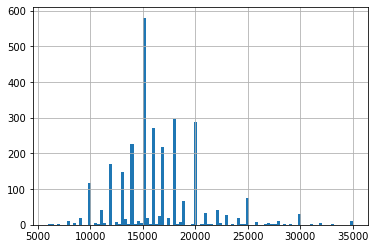

In [30]:
df['price'].hist(bins=100)

Обучим lightgbm модель на основе сгенерированных признаков, в качества таргета возьмем цену. Разбивку на трейн и тест сделаем случайную с помощью функции train_test_split с размером теста 0.25 от величины целого датасета

In [31]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb

OSError: dlopen(/Users/ofirserovlad/anaconda3/lib/python3.7/site-packages/lightgbm/lib_lightgbm.so, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/ofirserovlad/anaconda3/lib/python3.7/site-packages/lightgbm/lib_lightgbm.so
  Reason: image not found

In [28]:
trash_columns = ['ID  объявления', 'Адрес', 'Тип', 'Телефоны', 
                 'Ссылка на объявление', 'Балкон', 'Лифт', 
                 'Дом', 'Дополнительно', 'Можно с детьми/животными', 'Метро', 
                 'Мусоропровод', 'Название ЖК', 'Количество комнат', 'Окна',
                 'Ремонт', 'Площадь, м2', 'Серия дома', 
                 'Цена', 'url', 'Описание', 'lat', 'lon']
target = 'price'

In [29]:
features = list(set(df.columns) - set(trash_columns + [target]))
train, test = train_test_split(df, random_state=1337)

lgb_data_train = lgb.Dataset(train[features].values, train[target])
lgb_data_test = lgb.Dataset(test[features].values, test[target])
params = {
    'objective':'regression', 
    'metric': 'mae',
    'learning_rate': 0.05, 
    'nthread': 1,
    'reg_lambda': 30
}

model = lgb.train(params, lgb_data_train, 
                  valid_sets=[lgb_data_test, lgb_data_train],
                  num_boost_round=3500,
                  early_stopping_rounds=100, verbose_eval=40)

Training until validation scores don't improve for 100 rounds
[40]	training's l1: 2089.46	valid_0's l1: 2240.65
[80]	training's l1: 1848.97	valid_0's l1: 2165.01
[120]	training's l1: 1706.61	valid_0's l1: 2146.64
[160]	training's l1: 1594.27	valid_0's l1: 2162.18
[200]	training's l1: 1501.44	valid_0's l1: 2179.39
Early stopping, best iteration is:
[116]	training's l1: 1718.39	valid_0's l1: 2146.12


##### Цена сдачи однокомнатной квартиры в гз

In [30]:
pred = model.predict(test[test['ID  объявления'] == 'gz_room'][features])
pred

array([ 16382.19974104])

Оценим влияние каждого фактора с помощью feature importance - количество узлов приходящихся на каждый признак

In [31]:
(pd.DataFrame({'name': features, 
              'importance': model.feature_importance()})
 .sort_values('importance', ascending=False)
 .head(10))

,importance,name
11,566,distance_to_center
15,419,minute_to_metro
18,386,square_0
25,364,square_1
28,278,square_2
29,209,max_floor
24,189,"Высота потолков, м"
7,136,Состав съемщиков
14,125,floor
4,95,wall_material


Также можно оценить более качественно влияние каждого их признаков с помощью библиотеки SHAP

[статья](http://papers.nips.cc/paper/7062-a-unified-approach-to-interpreting-model-predictions.pdf)

На графике ниже можно видеть влияние каждого признака на выход модели

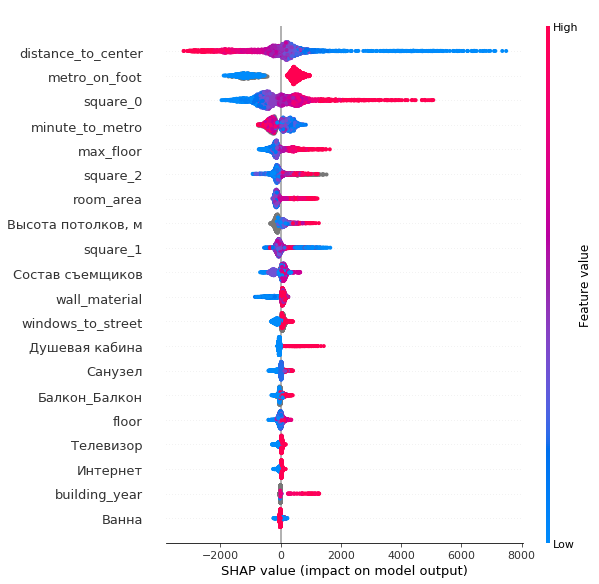

In [32]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(df[features])
shap.summary_plot(shap_values, df[features])

## Добавим признаки связанные с ближайшими геообъектами
- Кафе
- Школы
- Детские сады
- Полицейские участки
- Банки

Для этого скачаем данные Open Street Maps

In [33]:
# %%bash
# mkdir ../../data
# mkdir ../../data/cent_fed
# wget -O ../../data/central-fed.shp.zip   http://download.geofabrik.de/russia/central-fed-district-latest-free.shp.zip
# unzip ../../data/central-fed.shp.zip -d ../../data/cent_fed
# ls -l .../../data/cent_fed/

Для поиска ближайших соседей переведем все координаты из долготы и широты в метрическое расстояние по долготе и широте от центра Москвы

In [34]:
lat_meters = 111300
lon_meters = 57476

def center_lat_to_meter(lat):
    return (lat - center['lat']) * lat_meters

def center_lon_to_meter(lon):
    return (lon - center['lon']) * lon_meters


In [35]:
df['lat_meter'] = df['lat'].apply(center_lat_to_meter)
df['lon_meter'] = df['lon'].apply(center_lon_to_meter)

формат этих файлов .shp, в них хранится информация о геометрии объекта, класс и название. Можно итерироваться по этим объектам с помощью функции reader.iterShapeRecords() которая возвращает генератор. Каждый объект содержит два поля record и shаpe

In [36]:
import shapefile

In [37]:
reader = shapefile.Reader('../../data/cent_fed/gis_osm_pois_free_1')

Пройдемся по всем записям и сохраним лишь те, что рассположены на расстоянии 40 км

In [38]:
max_distance  = 40000
out = []
for point in reader.iterShapeRecords():
    lon, lat = np.mean(point.shape.points, axis=0)
    lat_meter =  center_lat_to_meter(lat)
    lon_meter = center_lon_to_meter(lon)
    if np.abs(lat_meter) > max_distance or np.abs(lon_meter) > max_distance :
        continue
    out.append({'category': point.record[2], 
                'lat': lat, 
                'lon': lon,
                'lat_meter': lat_meter,
                'lon_meter': lon_meter,
               })

In [39]:
df_poi = pd.DataFrame(out)

Посмотрим, где расположены кинотеатры в Москве

In [40]:
df_cafe = df_poi[df_poi['category'] == 'cinema']

In [41]:
map_folium = folium.Map(location=(center['lat'], center['lon']),
                        tiles='Stamen Toner',
                        zoom_start=11)
for ind, row in df_cafe.iterrows():
    folium.CircleMarker([row['lat'], row['lon']],
                        radius=1,
                        fill=True, 
                        fill_opacity=0.9
                       ).add_to(map_folium)
map_folium

Для быстрого поиска ближайших объектов к определенной точки, создадим структуру данных KDTree и будем делать запросы к ней

In [42]:
from scipy import spatial

In [43]:
kdtree = spatial.KDTree(df_poi[['lat_meter', 'lon_meter']].values)

Первый элемет - расстояние, второй - индекс

In [44]:
kdtree.query([55, 37], 4)

(array([ 20.77675998,  21.55709842,  21.76028261,  22.12623911]),
 array([45746, 45743, 45737, 45745]))

Объекты в радиусе

In [45]:
kdtree.query_ball_point([55, 37], 30)

[33376, 45736, 45737, 45738, 45740, 45743, 45745, 45746, 45749, 45751, 45759]

Пройдемся по категориям, которые посчитали, что внесут вклад в уточнение стоимости и посчитаем средние расстояния до этих объектов среди 1 и 5 соседей и количество объектов в радиусе 500 и 1000 метров

In [46]:
important_category_poi = ['cinema', 'supermarket', 'cafe', 'police', 
                          'museum', 'fast_food', 'bank', 'beauty_shop',
                          'school']

In [47]:
for cat in tqdm(important_category_poi):
    df_poi_cat = df_poi[df_poi['category'] == cat]
    df_poi_cat = df_poi_cat.reset_index(drop=True)
    kdtree = spatial.KDTree(df_poi_cat[['lat_meter', 'lon_meter']].values)
    distances = kdtree.query(df[['lat_meter', 'lon_meter']].values, 16)[0]
    for nearest in [1, 5]:
        df[f'distance_to_{cat}_between_{nearest}'] = np.mean(distances[:, :nearest], axis=1)
        
    for distance in [500, 1000]:
        nearests = kdtree.query_ball_point(df[['lat_meter', 'lon_meter']].values, distance)
        df[f'nearest_{cat}_within_{distance}'] = nearests
        df[f'nearest_{cat}_within_{distance}'] = df[f'nearest_{cat}_within_{distance}'].apply(len)

100%|██████████| 9/9 [00:47<00:00,  5.31s/it]


Снова обучим модель и посмотрим на сколько изменилось качество

In [48]:
trash_columns += ['lat_meter', 'lon_meter']

In [49]:
features = list(set(df.columns) - set(trash_columns + [target]))

In [50]:
train, test = train_test_split(df, random_state=1337)

lgb_data_train = lgb.Dataset(train[features].values, train[target])
lgb_data_test = lgb.Dataset(test[features].values, test[target])
params = {
    'objective':'regression', 
    'metric': 'mae',
    'learning_rate': 0.04, 
    'nthread': 1,
    'reg_lambda': 30,
    'subsample': 0.9,
    'feature_fraction': 0.9
}

model = lgb.train(params, lgb_data_train, 
                  valid_sets=[lgb_data_test, lgb_data_train],
                  num_boost_round=3500,
                  early_stopping_rounds=100, verbose_eval=40)

Training until validation scores don't improve for 100 rounds
[40]	training's l1: 2107.57	valid_0's l1: 2295.49
[80]	training's l1: 1798.02	valid_0's l1: 2157.18
[120]	training's l1: 1606.22	valid_0's l1: 2128.06
[160]	training's l1: 1454.31	valid_0's l1: 2115.78
[200]	training's l1: 1323.92	valid_0's l1: 2109.56
[240]	training's l1: 1212.33	valid_0's l1: 2111.7
[280]	training's l1: 1117.14	valid_0's l1: 2114.58
Early stopping, best iteration is:
[210]	training's l1: 1293.75	valid_0's l1: 2107.53


In [51]:
model.predict(test[test['ID  объявления'] == 'gz_room'][features])

array([ 16858.23785733])

In [52]:
(pd.DataFrame({'name': features, 
              'importance': model.feature_importance()})
 .sort_values('importance', ascending=False)
 .head(25))

,importance,name
33,365,square_0
21,345,distance_to_center
26,280,minute_to_metro
31,263,distance_to_cinema_between_5
52,206,distance_to_cinema_between_1
34,200,distance_to_police_between_5
55,197,square_2
13,197,distance_to_museum_between_1
66,196,distance_to_museum_between_5
1,195,distance_to_supermarket_between_5


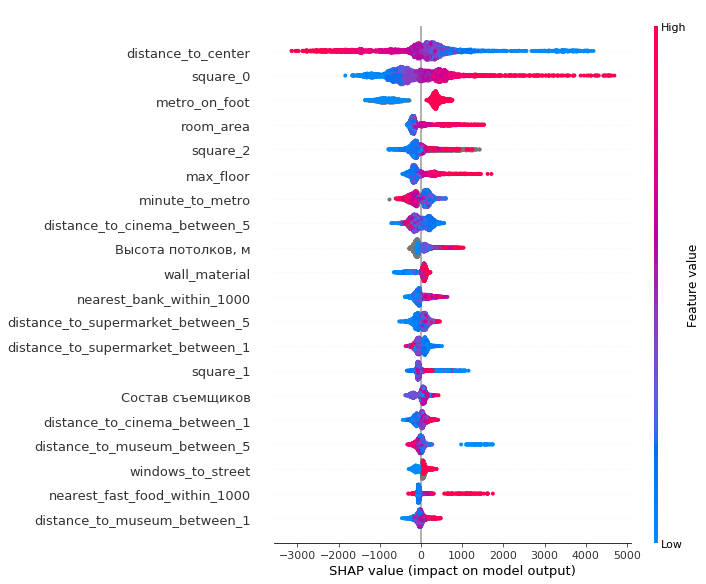

In [53]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(df[features])
shap.summary_plot(shap_values, df[features])